In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical

C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Qureshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


C:\Users\Qureshi\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


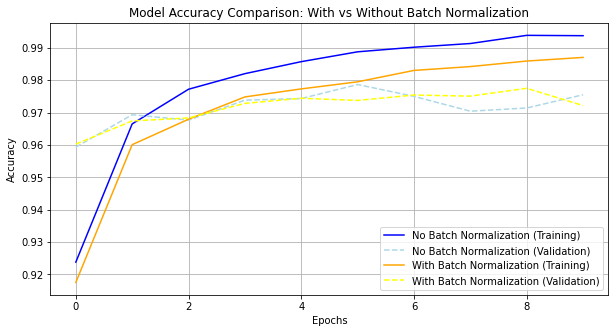

In [2]:
#BatchNormalization

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Train model without Batch Normalization
model_no_bn = Sequential()
model_no_bn.add(Flatten(input_shape=(28, 28, 1)))
model_no_bn.add(Dense(128, activation='relu'))
model_no_bn.add(Dense(64, activation='relu'))
model_no_bn.add(Dense(10, activation='softmax'))
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_no_bn = model_no_bn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Train model with Batch Normalization
model_with_bn = Sequential()
model_with_bn.add(Flatten(input_shape=(28, 28, 1)))
model_with_bn.add(Dense(128, activation='relu'))
model_with_bn.add(BatchNormalization())  # Add Batch Normalization
model_with_bn.add(Dense(64, activation='relu'))
model_with_bn.add(BatchNormalization())  # Add Batch Normalization
model_with_bn.add(Dense(10, activation='softmax'))
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_with_bn = model_with_bn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_no_bn.history['accuracy'], label='No Batch Normalization (Training)', color='blue')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Normalization (Validation)', color='lightblue', linestyle='dashed')
plt.plot(history_with_bn.history['accuracy'], label='With Batch Normalization (Training)', color='orange')
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Normalization (Validation)', color='yellow', linestyle='dashed')
plt.title('Model Accuracy Comparison: With vs Without Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
